<div style="background-color: #800000; padding: 20px; position: relative;">
    <h1 align="center" style="color: white; font-weight: bold;">
        AtliQ Hotels Data Analysis Project
    </h1>
    <div style="position: absolute; bottom: 10px; right: 20px; color: white; font-size: small;">
        - Amit Vishwakarma
    </div>
</div>


## **Problem Statement:**

Atliq Grands, a leading player in India's hotel industry, is currently facing challenges with rising competition and declining revenue. The company is also experiencing a loss of market share. To combat these challenges, the management team has decided to harness data and strategic insights. With limited internal expertise in data analysis, they have sought external support to assess the situation, deliver actionable insights, and develop effective strategies for customer retention and revenue growth.

## **Project Goal:**

The goal of this project is to conduct a comprehensive analysis of the hotel industry domain using Python. By leveraging data-driven insights and strategic recommendations, the objective is to empower Atliq Grands to make informed decisions. The ultimate aim is to assist Atliq Grands in regaining a competitive edge in the market, addressing their challenges of revenue decline and market share loss effectively.

## **Datasets:**
- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_bookings.csv
- new_data_august.csv
- fact_aggregated_bookings.csv

## **Data Analysis Process:**
1. Data Import & Exploration
2. Data Cleaning
3. Data Transformation
4. Data Insights
5. Key Insights Summary
6. Recommendations

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold ">1. Data Import and Data Exploration</h2>
</div>


In [ ]:
import pandas as pd

**Read bookings data in a datagrame**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fact_bookings.csv to fact_bookings.csv


In [ ]:
df_bookings = pd.read_csv('fact_bookings.csv')

**Explore bookings data**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.shape

(134590, 12)

In [ ]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [ ]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


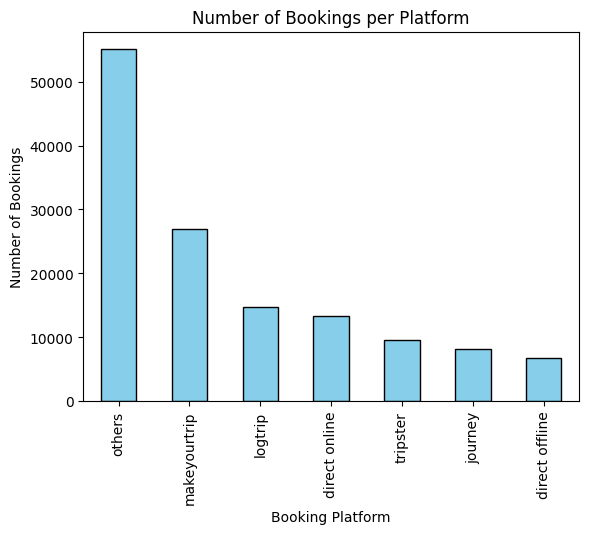

In [ ]:

# Plot the value counts of booking platforms as a bar chart

import matplotlib.pyplot as plt

df_bookings.booking_platform.value_counts().plot(kind="bar", color='skyblue', edgecolor='black')

# Add a title and labels
plt.title("Number of Bookings per Platform")
plt.xlabel("Booking Platform")
plt.ylabel("Number of Bookings")

# Show the plot
plt.show()


In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


**Read rest of the files**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fact_aggregated_bookings.csv to fact_aggregated_bookings.csv


In [ ]:
df_date = pd.read_csv('dim_date.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

In [ ]:
df_hotels.shape

(25, 4)

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


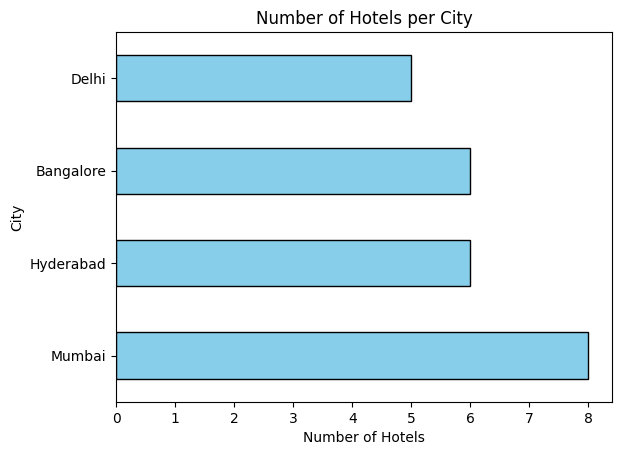

In [ ]:
import matplotlib.pyplot as plt

# Plot value counts of cities as a horizontal bar chart

ax = df_hotels.city.value_counts().plot(kind="barh", color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Number of Hotels per City")
plt.xlabel("Number of Hotels")
plt.ylabel("City")

plt.show()



<br> <!-- Creates a small blank space -->


## **Exercise: Explore Aggregate Bookings**


In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


#### **Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [ ]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

#### **Exercise-2. Find out total bookings per property_id**

In [ ]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


#### **Exercise-3. Find out days on which bookings are greater than capacity**

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


#### **Exercise-4. Find out properties that have highest capacity**

In [ ]:
df_agg_bookings.capacity.max()

50.0

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold ">2. Data Cleaning</h2>
</div>


In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


#### **(1) Clean invalid guests**

In [ ]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [ ]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [ ]:
df_bookings.shape

(134590, 12)

#### **(2) Outlier removal in revenue generated**

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 45220)

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(14916.013188201203, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [ ]:
higher_limit = avg + 3*std
higher_limit

34274.61740350578

In [ ]:
lower_limit = avg - 3*std
lower_limit

-4442.591027103368

In [ ]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,2022-04-30,2022-05-01,2022-05-02,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,2022-07-10,2022-07-31,2022-08-06,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,2022-07-31,2022-07-31,2022-08-01,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [ ]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(133070, 12)

In [ ]:
df_bookings.revenue_realized.describe().round(2)

,revenue_realized
count,133070.00
mean,12468.78
std,6537.75
min,2600.00
25%,7600.00
50%,11400.00
75%,15300.00
max,34200.00


In [ ]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

32082.021279985467

In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,2022-04-26,2022-05-01,2022-05-02,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,2022-04-28,2022-05-01,2022-05-03,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,2022-04-30,2022-05-01,2022-05-06,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,2022-07-31,2022-07-31,2022-08-02,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,2022-07-31,2022-07-31,2022-08-03,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [ ]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe().round(2)

,revenue_realized
count,14553.00
mean,22483.44
std,8338.25
min,7600.00
25%,19000.00
50%,22800.00
75%,31350.00
max,34200.00


In [ ]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [ ]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,2022-04-29,2022-05-01,2022-05-02,2,RT2,logtrip,4.0,Checked Out,12600,12600


In [ ]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77054
booking_status,0


Total values in our dataframe is 133070. Out of that 77054 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

## Excercises :-

#### **Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [ ]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [ ]:
df_agg_bookings.capacity.median()

25.0

In [ ]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [ ]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


#### **Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">3. Data Transformation</h2>
</div>


#### **Create occupancy percentage column**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [ ]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [ ]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [ ]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occ_pct              9200 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 431.4+ KB


<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">4. Insights Generations</h2>
</div>


### **1. What is an average occupancy rate in each of the room categories?**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

,occ_pct
room_category,
RT1,58.23
RT2,58.04
RT3,58.03
RT4,59.30


I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [ ]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [ ]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


In [ ]:
df.groupby("room_class")["occ_pct"].mean().round(2)

,occ_pct
room_class,
Elite,58.04
Premium,58.03
Presidential,59.30
Standard,58.23


In [ ]:
df[df.room_class=="Standard"].occ_pct.mean().round(2)

58.23

### **2. Print average occupancy rate per city**

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [ ]:
avg_occupancy_rate_per_city = df.groupby("city")["occ_pct"].mean().round(2)
avg_occupancy_rate_per_city

,occ_pct
city,
Bangalore,56.59
Delhi,61.61
Hyderabad,58.14
Mumbai,57.94


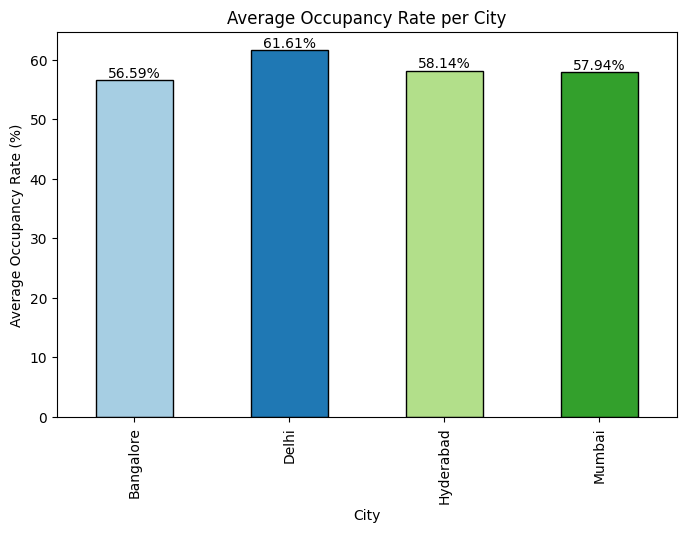

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_occupancy_rate_per_city.plot.bar(
    color=plt.cm.Paired.colors,  # Different colors for each bar
    edgecolor='black'            # Outline the bars
)

# Add a title and labels
plt.title("Average Occupancy Rate per City")
plt.xlabel("City")
plt.ylabel("Average Occupancy Rate (%)")

# Show the percentage value on top of each bar
for i, value in enumerate(avg_occupancy_rate_per_city):
    plt.text(i, value + 0.5, f'{value}%', ha='center', fontsize=10)

# Show the plot
plt.show()


### **3. When was the occupancy better? Weekday or Weekend?**

In [ ]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [ ]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [ ]:
df.groupby("day_type")["occ_pct"].mean().round(2)

,occ_pct
day_type,
weekeday,50.90
weekend,72.39


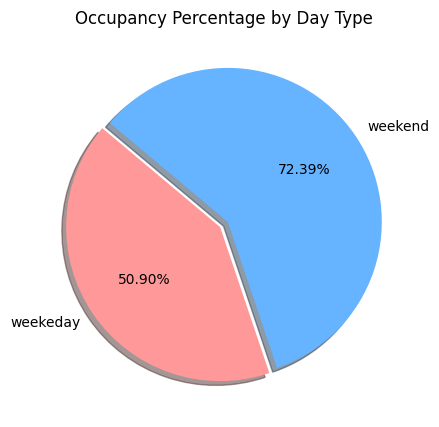

In [ ]:
import matplotlib.pyplot as plt

# Group by 'day_type' and calculate the mean of 'occ_pct'
mean_occ_pct = df.groupby("day_type")["occ_pct"].mean().round(2)

# Create and display the pie chart
plt.figure(figsize=(5, 5))  # Set figure size for better readability
plt.pie(
    mean_occ_pct,
    labels=mean_occ_pct.index,  # Use day_type as labels
    autopct=lambda p: '{:.2f}%'.format(p * sum(mean_occ_pct) / 100),  # Display exact percentage values
    startangle=140,
    explode=[0.03] * len(mean_occ_pct),  # Slightly explode all slices for emphasis
    shadow=True,
    colors=['#ff9999', '#66b3ff']  # Adjust colors based on the number of slices
)

plt.title("Occupancy Percentage by Day Type")
plt.gca().set_aspect('equal')  # Ensure the pie chart is circular
plt.show()


### **4: In the month of June, what is the occupancy for different cities**

In [ ]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [ ]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

,occ_pct
city,
Delhi,62.47
Hyderabad,58.46
Mumbai,58.38
Bangalore,56.58


### **5: We got new data for the month of august. Append that to existing data**

In [ ]:
from google.colab import files
uploaded = files.upload()

df_august = pd.read_csv("new_data_august.csv")
df_august.head(3)

Saving new_data_august.csv to new_data_august (2).csv


,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,1-Aug-22,22-Aug,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,1-Aug-22,22-Aug,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,1-Aug-22,22-Aug,W 32,weekeday,23,30,76.67


In [ ]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [ ]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [ ]:
df_august.shape

(7, 13)

In [ ]:
df.shape

(6500, 14)

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,18560,31-Jul-22,RT4,12,15.0,80.0,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,1-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,22-Aug,W 32,weekeday,100.00
6501,19562,1-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,22-Aug,W 32,weekeday,70.00
6502,19563,1-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,22-Aug,W 32,weekeday,76.67
6503,19558,1-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,22-Aug,W 32,weekeday,75.00
6504,19560,1-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,22-Aug,W 32,weekeday,76.92
6505,17561,1-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,22-Aug,W 32,weekeday,69.23
6506,17564,1-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,22-Aug,W 32,weekeday,62.50


In [ ]:
latest_df.shape

(6507, 15)

### **6. Print revenue realized per city**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

,revenue_realized
city,
Bangalore,415122840
Delhi,289472918
Hyderabad,325232870
Mumbai,629391323


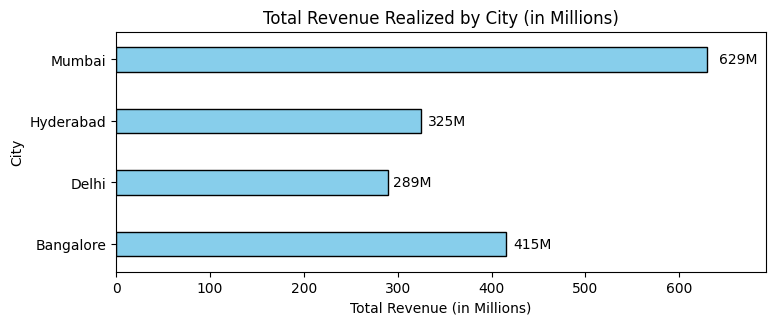

In [ ]:
import matplotlib.pyplot as plt

# Group by city and calculate the total revenue
city_revenue = df_bookings_all.groupby("city")["revenue_realized"].sum()

# Convert revenue to millions
city_revenue_millions = city_revenue / 1_000_000

# Create the horizontal bar chart with adjusted figure size
plt.figure(figsize=(10, 3))  # Adjust the figure size for better spacing

ax = city_revenue_millions.plot(kind="barh", color='skyblue', edgecolor='black', width=0.4)  # Adjust bar width

# Add title and labels
plt.title("Total Revenue Realized by City (in Millions)")
plt.xlabel("Total Revenue (in Millions)")
plt.ylabel("City")

# Adjust x-axis limits to ensure highest value is fully shown
plt.xlim(0, city_revenue_millions.max() * 1.1)  # Extend the x-axis limit by 10%

# Annotate values on bars
for p in ax.patches:
    plt.text(p.get_width() + 0.02 * p.get_width(), p.get_y() + p.get_height() / 2.,
             f'{p.get_width():,.0f}M', ha='left', va='center')

plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.1)  # Adjust subplot parameters for spacing
plt.show()


### **7. Print month by month revenue**

In [ ]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [ ]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [ ]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')
df_date.head()

<ipython-input-93-aff778bb3d8a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [ ]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133070 entries, 0 to 133069
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133070 non-null  object 
 1   property_id        133070 non-null  int64  
 2   booking_date       133070 non-null  object 
 3   check_in_date      133070 non-null  object 
 4   checkout_date      133070 non-null  object 
 5   no_guests          133070 non-null  int64  
 6   room_category      133070 non-null  object 
 7   booking_platform   133070 non-null  object 
 8   ratings_given      56016 non-null   float64
 9   booking_status     133070 non-null  object 
 10  revenue_generated  133070 non-null  int64  
 11  revenue_realized   133070 non-null  int64  
 12  property_name      133070 non-null  object 
 13  category           133070 non-null  object 
 14  city               133070 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [ ]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors='coerce')
df_bookings_all.head(3)

#  errors='coerce'

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [ ]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

,revenue_realized
mmm yy,
Jul 22,556460174
Jun 22,537219271
May 22,565540506


## **Excercises :-**

### **Exercise-1. Print revenue realized per hotel type**

In [ ]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [ ]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

,revenue_realized
property_name,
Atliq Seasons,62430375
Atliq Grands,207800708
Atliq Bay,255735290
Atliq Blu,256643260
Atliq City,279554213
Atliq Palace,294193161
Atliq Exotica,302862944


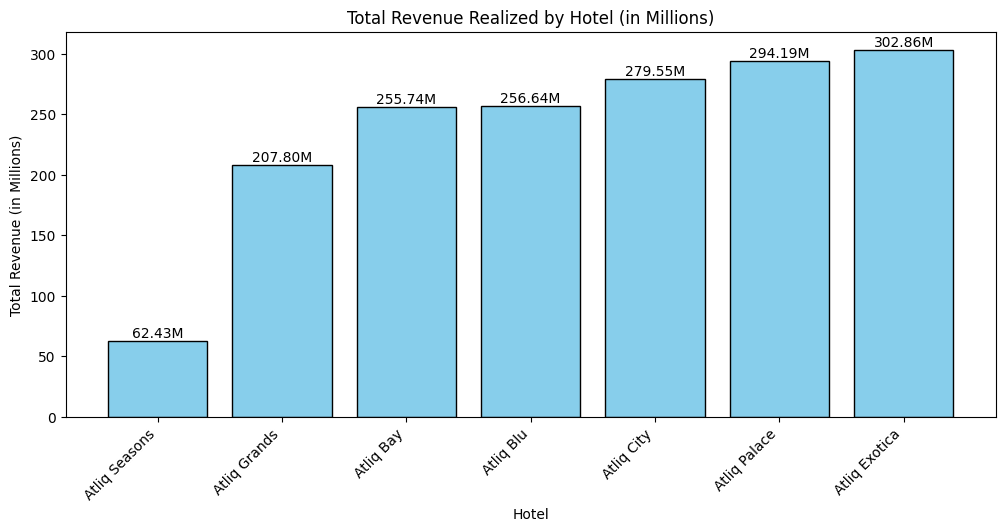

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting (converted to millions)
revenue_by_hotel_millions = df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values() / 1_000_000

# Create vertical bar chart
plt.figure(figsize=(12, 5))
plt.bar(revenue_by_hotel_millions.index, revenue_by_hotel_millions, color='skyblue', edgecolor='black')
plt.title("Total Revenue Realized by Hotel (in Millions)")
plt.xlabel("Hotel")
plt.ylabel("Total Revenue (in Millions)")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Annotate values on bars
for i, value in enumerate(revenue_by_hotel_millions):
    plt.text(i, value + 0.3, f'{value:.2f}M', ha='center', va='bottom')

plt.show()


### **Exercise-2 Print average rating per city**

In [ ]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

,ratings_given
city,
Bangalore,3.41
Delhi,3.78
Hyderabad,3.66
Mumbai,3.65


### **Exercise-3 Print a pie chart of revenue realized per booking platform**

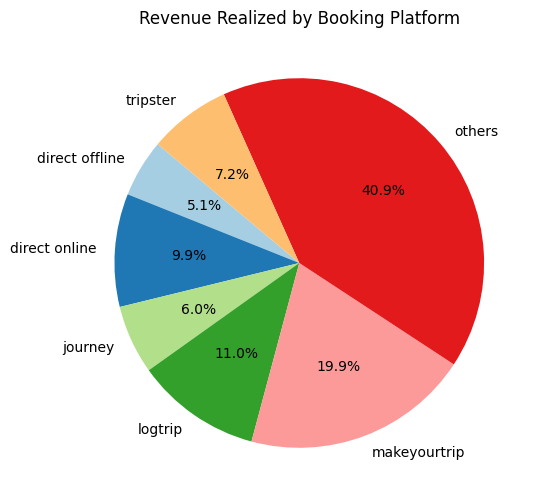

In [ ]:
import matplotlib.pyplot as plt

# Group by booking platform and calculate total revenue realized
revenue_by_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(revenue_by_platform, labels=revenue_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(revenue_by_platform))), startangle=140)

# Add title
plt.title("Revenue Realized by Booking Platform")

plt.show()


<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">5. Key Insights Summary</h2>
</div>


### **Average Occupancy by Room Type**

- Presidential rooms have the highest average occupancy (59.30%).
- Elite and Premium rooms have the lowest average occupancy (58.03% and 58.04%).

### **Average Occupancy Rate per City**

- Delhi has the highest average occupancy rate (61.61%).
- Bangalore has the lowest average occupancy rate (56.59%).

### **Weekday vs. Weekend Occupancy**

- Occupancy is significantly higher on weekends (72.39%) compared to weekdays (50.90%).

### **Occupancy Rates in June**

- Delhi had the highest occupancy in June (62.47%).
- Bangalore had the lowest occupancy in June (56.58%).

### **Revenue Realized per City**

- Mumbai generates the highest revenue (`$668,569,251`).
- Bangalore generates the lowest revenue (`$420,383,550`).

### **Revenue by Hotel Type**

- Atliq Exotica has the highest revenue (`$32,436,799`).
- Atliq Seasons has the lowest revenue (`$6,672,245`).

### **Average Rating per City**

- Delhi has the highest average rating (3.79).
- Bangalore has the lowest average rating (3.41).


<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">6. Recommendations</h2>
</div>




### **1. Promote Less Popular Room Types and Cities**

- Use targeted promotions and partnerships to boost occupancy in less popular room types and cities.

### **2. Enhance Weekday Occupancy**

- Create attractive weekday offers and corporate partnerships to balance occupancy rates.

### **3. Adjust Strategies Based on Revenue and Ratings**

- Focus on cities and hotel types with lower revenue and ratings for targeted improvements.

### **4. Utilize Data for Decision-Making**

- Regularly integrate and analyze new data to make informed decisions and forecasts.

### **5. Improve Customer Satisfaction**
   - Invest in training and resources to enhance guest experience, particularly in cities and hotel types with lower average ratings.

### **6. Optimize Marketing Efforts**
   - Tailor marketing campaigns based on historical data to effectively target high-potential markets and improve overall occupancy and revenue.

<--------------------   Presented by Amit Vishwakarma   -------------------->